In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gym

from rlemmc import environment, policy, trajectory, montecarlo

In [2]:
# Environment
horizon = 30
env = environment.CartPoleEnvironment()

[2017-03-06 16:35:43,971] Making new env: CartPole-v0


In [3]:
# Inference
sampleCount = 100
iterationCount = 20
selectedInference = montecarlo.importance_sampling

In [4]:
# Policy
policySampleCount = 10
p = policy.LinearPolicySVC()

In [5]:
def plot_trajectories(states, color='red'):

    [sample_count, _, _] = states.shape

    for s in range(sample_count):
        plt.plot(states[s, :, 0], states[s, :, 2], '-', color=color)
        # plt.plot(states[s, :, 0], states[s, :, 2], 'o', color=color)
        plt.plot(states[s, -1, 0], states[s, -1, 2], 'o', color=color)

In [6]:
def plot_iteration(states, newStates):
    plot_trajectories(states, color='red')
    plot_trajectories(newStates, color='green')
    
    plt.vlines(0, -0.25, 0.25, linestyle='dotted')
    # plt.vlines(2.4, -0.25, 0.25, linestyle='dotted')
    # plt.vlines(-2.4, -0.25, 0.25, linestyle='dotted')
    
    plt.hlines(0, -2.4, 2.4, linestyle='dotted')
    plt.hlines(0.25, -2.4, 2.4, linestyle='dotted')
    plt.hlines(-0.25, -2.4, 2.4, linestyle='dotted')
    
    plt.grid()
    plt.show()

In [7]:
def policyTrainingPerformance(states, actions):
    return np.mean(1* (actions.ravel() == p.query(states.reshape(policySampleCount * horizon, env.stateDimension))))

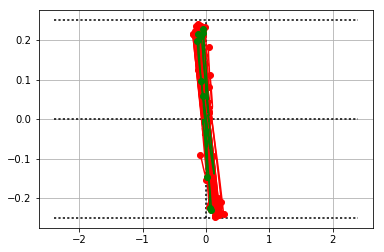

Iteration 1 - Average Reward : 20.36


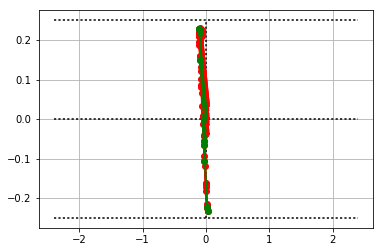

Iteration 2 - Average Reward : 21.28


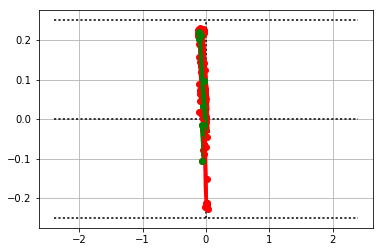

Iteration 3 - Average Reward : 26.150000000000002


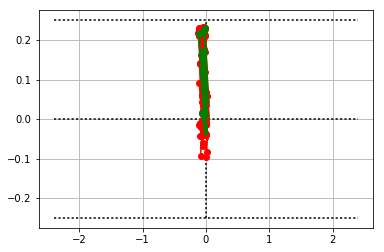

Iteration 4 - Average Reward : 26.75


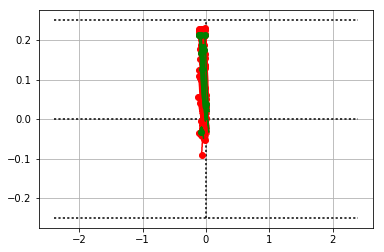

Iteration 5 - Average Reward : 27.78


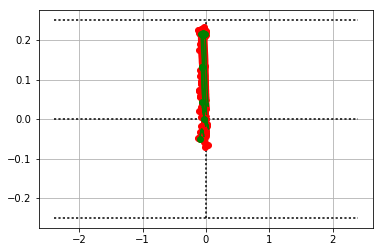

Iteration 6 - Average Reward : 27.720000000000002


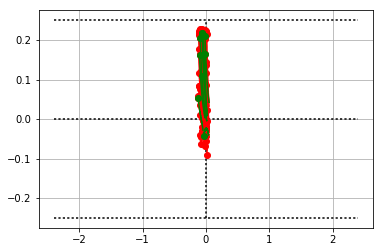

Iteration 7 - Average Reward : 27.67


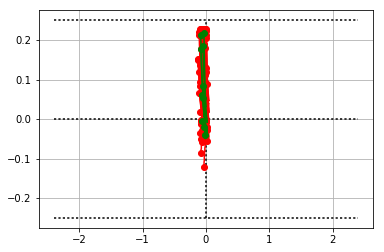

Iteration 8 - Average Reward : 27.88


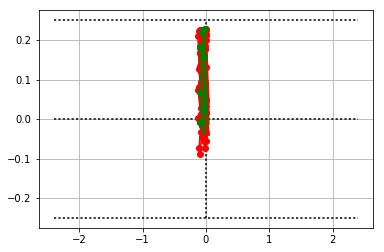

Iteration 9 - Average Reward : 27.65


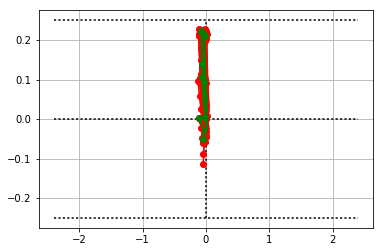

Iteration 10 - Average Reward : 28.03


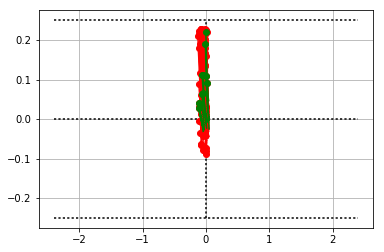

Iteration 11 - Average Reward : 28.2


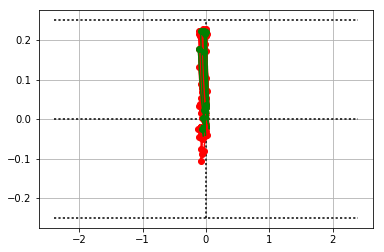

Iteration 12 - Average Reward : 28.229999999999997


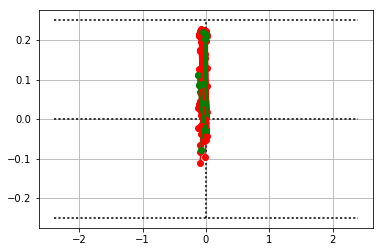

Iteration 13 - Average Reward : 28.150000000000002


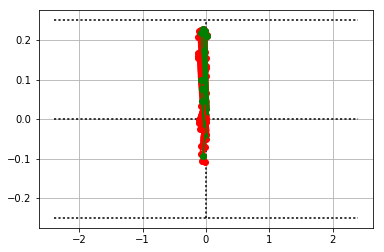

Iteration 14 - Average Reward : 28.080000000000002


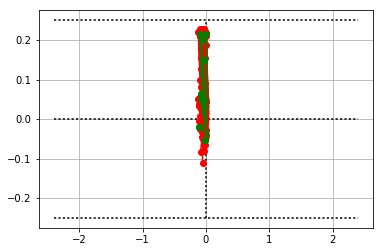

Iteration 15 - Average Reward : 28.03


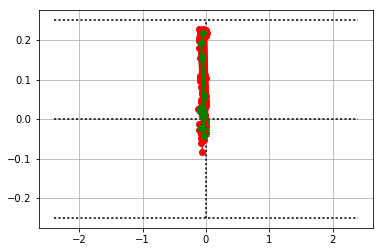

Iteration 16 - Average Reward : 28.21


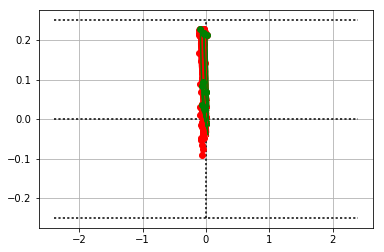

Iteration 17 - Average Reward : 27.69


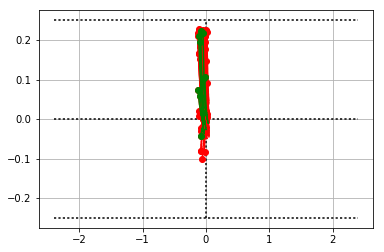

Iteration 18 - Average Reward : 27.97


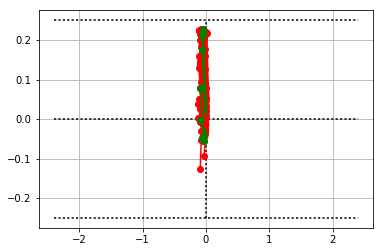

Iteration 19 - Average Reward : 27.88


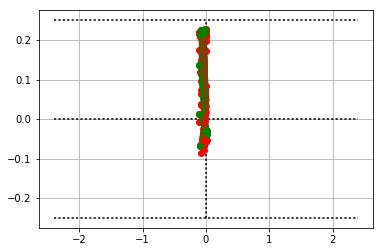

Iteration 20 - Average Reward : 27.64


In [8]:
iterationRewards = []

for i in range(iterationCount):

    if i == 0:
        # TODO Initial Linear Policy
        iterationPolicy = policy.UniformPolicyDiscrete(range(env.openAI.action_space.n))
    else:
        iterationPolicy = p

    [states, actions, rewards] = \
        trajectory.rollout_trajectories(env, iterationPolicy, horizon, sampleCount)

    # E-Step
    [newStates, newActions] = selectedInference(states, actions, np.sum(rewards, axis=1),policySampleCount)

    # M-Step
    p.m_step(newStates, newActions)
    
    # Plot Trajectories
    plot_iteration(states, newStates)
        
    # Average Reward
    iterationRewards.append(np.mean(rewards) * horizon)
    print( f'Iteration {i+1} - Average Reward : {iterationRewards[i]}')

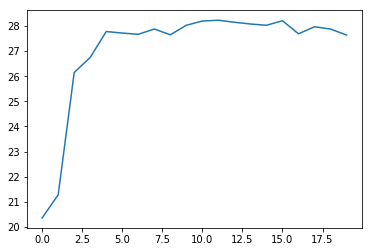

In [9]:
plt.plot(iterationRewards)
plt.show()